In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/AI/finalvoice.zip

Archive:  drive/MyDrive/AI/finalvoice.zip
  inflating: finalvoice.csv          
  inflating: finalvoice/0.wav        
  inflating: finalvoice/1.wav        
  inflating: finalvoice/10.wav       
  inflating: finalvoice/100.wav      
  inflating: finalvoice/101.wav      
  inflating: finalvoice/102.wav      
  inflating: finalvoice/103.wav      
  inflating: finalvoice/104.wav      
  inflating: finalvoice/105.wav      
  inflating: finalvoice/106.wav      
  inflating: finalvoice/107.wav      
  inflating: finalvoice/108.wav      
  inflating: finalvoice/109.wav      
  inflating: finalvoice/11.wav       
  inflating: finalvoice/110.wav      
  inflating: finalvoice/111.wav      
  inflating: finalvoice/112.wav      
  inflating: finalvoice/113.wav      
  inflating: finalvoice/114.wav      
  inflating: finalvoice/115.wav      
  inflating: finalvoice/116.wav      
  inflating: finalvoice/117.wav      
  inflating: finalvoice/118.wav      
  inflating: finalvoice/119.wav      
  inflat

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("finalvoice.csv")
data

,Id,Class
0,0,yes
1,1,yes
2,2,yes
3,3,yes
4,4,yes
...,...,...
217,217,NO
218,218,NO
219,219,NO
220,220,NO


In [ ]:
import IPython.display as ipd
ipd.Audio("finalvoice/0.wav")

In [ ]:
import librosa

In [ ]:
x,sr=librosa.load("finalvoice/0.wav")

In [ ]:
x

array([ 0.03104194, -0.0679208 , -0.1585151 , ...,  0.06972136,
        0.14807595, -0.01467755], dtype=float32)

In [ ]:
sr

22050

In [ ]:
import librosa.display

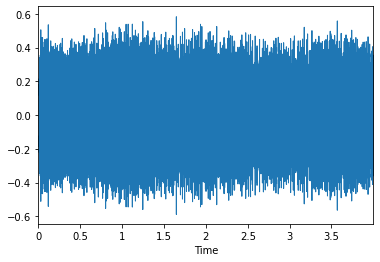

In [ ]:
librosa.display.waveplot(x,sr=sr)

In [ ]:
data.Class.value_counts()

NO     195
yes     27
Name: Class, dtype: int64

In [ ]:
fileid=pd.DataFrame()

In [ ]:
fileid["Id"] = data["Id"][:]

In [ ]:
fileid

,Id
0,0
1,1
2,2
3,3
4,4
...,...
217,217
218,218
219,219
220,220


In [ ]:
import os
import numpy as np

In [ ]:
def parser(row):
    # setting path
    file_name = os.path.join("finalvoice/",str(row.Id)+'.wav')
    print(file_name)
    # check if the file is corrupted
    try:
        # here kaiser_fast is a technique used for faster extraction
        # X-> audio_time_series_data; sample_rate-> sampling rate
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        
        # extraccting Mel-Frequeny Cepstral Coeficients feature from data
        # y -> accepts time-series audio data; sr -> accepts sampling rate
        # n_mfccs -> no. of MFCCs to return
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis = 0)
    
    except Exception as e:
        print("Error encountered while parsing file: ", e)
        return None, None
    
    # store mfccs features
    feature = mfccs
    # store the respective id
    data_id = row.Id
    
    return feature


In [ ]:
feature = fileid.apply(parser,axis=1)

finalvoice/0.wav
finalvoice/1.wav
finalvoice/2.wav
finalvoice/3.wav
finalvoice/4.wav
finalvoice/5.wav
finalvoice/6.wav
finalvoice/7.wav
finalvoice/8.wav
finalvoice/9.wav
finalvoice/10.wav
finalvoice/11.wav
finalvoice/12.wav
finalvoice/13.wav
finalvoice/14.wav
finalvoice/15.wav
finalvoice/16.wav
finalvoice/17.wav
finalvoice/18.wav
finalvoice/19.wav
finalvoice/20.wav
finalvoice/21.wav
finalvoice/22.wav
finalvoice/23.wav
finalvoice/24.wav
finalvoice/25.wav
finalvoice/26.wav
finalvoice/27.wav
finalvoice/28.wav
finalvoice/29.wav
finalvoice/30.wav
finalvoice/31.wav
finalvoice/32.wav
finalvoice/33.wav
finalvoice/34.wav
finalvoice/35.wav
finalvoice/36.wav
finalvoice/37.wav
finalvoice/38.wav
finalvoice/39.wav
finalvoice/40.wav
finalvoice/41.wav
finalvoice/42.wav
finalvoice/43.wav
finalvoice/44.wav
finalvoice/45.wav
finalvoice/46.wav
finalvoice/47.wav
finalvoice/48.wav
finalvoice/49.wav
finalvoice/50.wav
finalvoice/51.wav
finalvoice/52.wav
finalvoice/53.wav
finalvoice/54.wav
finalvoice/55.wav
fi

In [ ]:
feature

0      [-65.28037, -6.428145, -72.239784, 36.52887, -...
1      [-64.06197, -0.21237577, -73.10008, 34.636086,...
2      [-57.16247, 26.130924, -84.399345, 34.158283, ...
3      [-58.47942, 31.4295, -89.75626, 35.765377, -27...
4      [-74.76623, 24.743654, -88.41041, 47.032997, -...
                             ...                        
217    [-453.20984, 137.52773, 90.26924, 50.51244, 31...
218    [-488.7382, 131.78117, 84.09192, 46.92908, 30....
219    [-505.42023, 119.044785, 79.33661, 45.87288, 2...
220    [-456.87274, 134.99806, 87.84313, 49.23222, 31...
221    [-245.94284, 133.83647, -47.194942, -24.591505...
Length: 222, dtype: object

In [ ]:
feature_df = feature.to_frame()

In [ ]:
feature_df

,0
0,"[-65.28037, -6.428145, -72.239784, 36.52887, -..."
1,"[-64.06197, -0.21237577, -73.10008, 34.636086,..."
2,"[-57.16247, 26.130924, -84.399345, 34.158283, ..."
3,"[-58.47942, 31.4295, -89.75626, 35.765377, -27..."
4,"[-74.76623, 24.743654, -88.41041, 47.032997, -..."
...,...
217,"[-453.20984, 137.52773, 90.26924, 50.51244, 31..."
218,"[-488.7382, 131.78117, 84.09192, 46.92908, 30...."
219,"[-505.42023, 119.044785, 79.33661, 45.87288, 2..."
220,"[-456.87274, 134.99806, 87.84313, 49.23222, 31..."


In [ ]:
feature_df.columns = ["feature"]  ##加欄位名稱
feature_df

,feature
0,"[-65.28037, -6.428145, -72.239784, 36.52887, -..."
1,"[-64.06197, -0.21237577, -73.10008, 34.636086,..."
2,"[-57.16247, 26.130924, -84.399345, 34.158283, ..."
3,"[-58.47942, 31.4295, -89.75626, 35.765377, -27..."
4,"[-74.76623, 24.743654, -88.41041, 47.032997, -..."
...,...
217,"[-453.20984, 137.52773, 90.26924, 50.51244, 31..."
218,"[-488.7382, 131.78117, 84.09192, 46.92908, 30...."
219,"[-505.42023, 119.044785, 79.33661, 45.87288, 2..."
220,"[-456.87274, 134.99806, 87.84313, 49.23222, 31..."


In [ ]:
feature_df.reset_index(drop=True)
feature_df

,feature
0,"[-65.28037, -6.428145, -72.239784, 36.52887, -..."
1,"[-64.06197, -0.21237577, -73.10008, 34.636086,..."
2,"[-57.16247, 26.130924, -84.399345, 34.158283, ..."
3,"[-58.47942, 31.4295, -89.75626, 35.765377, -27..."
4,"[-74.76623, 24.743654, -88.41041, 47.032997, -..."
...,...
217,"[-453.20984, 137.52773, 90.26924, 50.51244, 31..."
218,"[-488.7382, 131.78117, 84.09192, 46.92908, 30...."
219,"[-505.42023, 119.044785, 79.33661, 45.87288, 2..."
220,"[-456.87274, 134.99806, 87.84313, 49.23222, 31..."


In [ ]:
class_df = pd.DataFrame()

In [ ]:
class_df["Class"] = data["Class"][:]
class_df

,Class
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
217,NO
218,NO
219,NO
220,NO


In [ ]:
wav_df = pd.concat([fileid,feature_df,class_df],axis=1)
wav_df

,Id,feature,Class
0,0,"[-65.28037, -6.428145, -72.239784, 36.52887, -...",yes
1,1,"[-64.06197, -0.21237577, -73.10008, 34.636086,...",yes
2,2,"[-57.16247, 26.130924, -84.399345, 34.158283, ...",yes
3,3,"[-58.47942, 31.4295, -89.75626, 35.765377, -27...",yes
4,4,"[-74.76623, 24.743654, -88.41041, 47.032997, -...",yes
...,...,...,...
217,217,"[-453.20984, 137.52773, 90.26924, 50.51244, 31...",NO
218,218,"[-488.7382, 131.78117, 84.09192, 46.92908, 30....",NO
219,219,"[-505.42023, 119.044785, 79.33661, 45.87288, 2...",NO
220,220,"[-456.87274, 134.99806, 87.84313, 49.23222, 31...",NO


In [ ]:
wav_df.to_pickle("wavdata")

##nn_audio

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_pickle("wavdata")
df

,Id,feature,Class
0,0,"[-65.28037, -6.428145, -72.239784, 36.52887, -...",yes
1,1,"[-64.06197, -0.21237577, -73.10008, 34.636086,...",yes
2,2,"[-57.16247, 26.130924, -84.399345, 34.158283, ...",yes
3,3,"[-58.47942, 31.4295, -89.75626, 35.765377, -27...",yes
4,4,"[-74.76623, 24.743654, -88.41041, 47.032997, -...",yes
...,...,...,...
217,217,"[-453.20984, 137.52773, 90.26924, 50.51244, 31...",NO
218,218,"[-488.7382, 131.78117, 84.09192, 46.92908, 30....",NO
219,219,"[-505.42023, 119.044785, 79.33661, 45.87288, 2...",NO
220,220,"[-456.87274, 134.99806, 87.84313, 49.23222, 31...",NO


In [ ]:
X = np.array(df.feature.tolist())
y = np.array(df.Class.tolist())

In [ ]:
X

array([[-6.52803726e+01, -6.42814493e+00, -7.22397842e+01, ...,
         8.15327549e+00,  4.62973022e+00,  1.44602175e+01],
       [-6.40619736e+01, -2.12375775e-01, -7.31000824e+01, ...,
         8.36281013e+00,  6.17936277e+00,  2.09884014e+01],
       [-5.71624718e+01,  2.61309242e+01, -8.43993454e+01, ...,
         1.00190172e+01,  1.18302717e+01,  1.84970779e+01],
       ...,
       [-5.05420227e+02,  1.19044785e+02,  7.93366089e+01, ...,
        -2.23070121e+00, -1.54409063e+00, -1.32990122e+00],
       [-4.56872742e+02,  1.34998062e+02,  8.78431320e+01, ...,
        -3.65371609e+00, -2.08730435e+00, -4.99052644e-01],
       [-2.45942841e+02,  1.33836472e+02, -4.71949425e+01, ...,
        -2.60090232e+00, -1.70393920e+00, -6.91669703e-01]], dtype=float32)

In [ ]:
y

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
len(x_test)

67

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn import metrics

In [ ]:
#filter_size = 2

def categorical_classifier():
    model = Sequential()

    # input and first hidden layer
    model.add(Dense(input_shape=(40,), units=256, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # second hidden layer
    model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # output layer
    model.add(Dense(units=2, activation='softmax'))

    # compiling our model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    # training the data
    #model.fit(X,y, batch_size=32, epochs=500,validation_split=0.3)
    return model

In [ ]:
model = categorical_classifier()

In [ ]:
his=model.fit(x_train,y_train,batch_size=256, epochs=30,validation_data=(x_train,y_train))

Epoch 1/30
1/1 [==============================] - 15s 15s/step - loss: 1.8606 - accuracy: 0.6968 - val_loss: 1.3481 - val_accuracy: 0.8839
Epoch 2/30
1/1 [==============================] - 0s 25ms/step - loss: 1.6818 - accuracy: 0.8774 - val_loss: 1.3936 - val_accuracy: 0.8839
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 1.5249 - accuracy: 0.8903 - val_loss: 1.1330 - val_accuracy: 0.8903
Epoch 4/30
1/1 [==============================] - 0s 21ms/step - loss: 1.2948 - accuracy: 0.8968 - val_loss: 0.7989 - val_accuracy: 0.9032
Epoch 5/30
1/1 [==============================] - 0s 21ms/step - loss: 1.0038 - accuracy: 0.9097 - val_loss: 0.4888 - val_accuracy: 0.9290
Epoch 6/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6767 - accuracy: 0.8903 - val_loss: 0.3345 - val_accuracy: 0.8774
Epoch 7/30
1/1 [==============================] - 0s 25ms/step - loss: 0.4679 - accuracy: 0.9032 - val_loss: 0.3642 - val_accuracy: 0.8710
Epoch 8/30
1/1 [===========

In [ ]:
#model.fit(x_train,y_train, batch_size=195, epochs=40,validation_data=(x_test, y_test))

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0746 - accuracy: 0.9851


[0.07459045201539993, 0.9850746393203735]

In [ ]:
#his.history

In [ ]:
model.save("wav_audio.h5")

##model predict

In [ ]:
from keras.models import load_model
model=load_model("wav_audio.h5")

In [ ]:
y_test[5:6]

array([[1., 0.]], dtype=float32)

In [ ]:
r = model.predict_classes(x_test[5:6])
r

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

In [ ]:
k = np.array(df.feature[5:6].tolist())

In [ ]:
r = model.predict_classes(k)
r[0]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1

In [ ]:
nn = lb.inverse_transform([r[0]])
nn[0]

'yes'

In [ ]:
fileidtest = df.Id[5:6]
fileidtest

5    5
Name: Id, dtype: int64

In [ ]:
import IPython.display as ipd

In [ ]:
filename = "finalvoice/" + str(fileidtest.tolist()[0]) + '.wav'
ipd.Audio(filename)

In [ ]:
df.Class[5:6].tolist()[0]

'yes'

In [ ]:
def pred(key):
  r = model.predict_classes(np.array(df.feature[key:key+1].tolist()))
  name = lb.inverse_transform([r[0]])[0]
  return name

In [ ]:
def ans(key):
  return df.Class[key:key+1].tolist()[0]

In [ ]:
pred(5)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'yes'

In [ ]:
ans(5)

'yes'

In [ ]:
filename = "finalvoice/" + str(df.Id[5:6].tolist()[0]) + '.wav'
ipd.Audio(filename)